In [57]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [59]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [60]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_numeric_cols = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_1y']

market_data_scaled = StandardScaler().fit_transform(market_data_df[market_data_numeric_cols])

market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.23545963, -0.0674951 , -0.25163688],
       [ 0.18544589,  0.93444504, -0.05434093, -0.27348273, -0.19935211],
       [ 0.02177396, -0.70633685, -0.06103015,  0.00800452, -0.28206051],
       [-0.04076438, -0.81092807, -0.05038797, -0.37316402, -0.29554614],
       [ 1.19303608,  2.00095907,  0.54584206, -0.29120287, -0.27031695]])

In [61]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_numeric_cols)

# Copy the crypto names from the original data
market_data_scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df.set_index('coin_id', inplace = True)

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_1y
coin_id,,,,,
bitcoin,0.508529,0.493193,0.235460,-0.067495,-0.251637
ethereum,0.185446,0.934445,-0.054341,-0.273483,-0.199352
tether,0.021774,-0.706337,-0.061030,0.008005,-0.282061
ripple,-0.040764,-0.810928,-0.050388,-0.373164,-0.295546
bitcoin-cash,1.193036,2.000959,0.545842,-0.291203,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [62]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

,k,inertia
0,1,205.000000
1,2,148.948881
2,3,115.485078
3,4,53.469590
4,5,43.057771


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

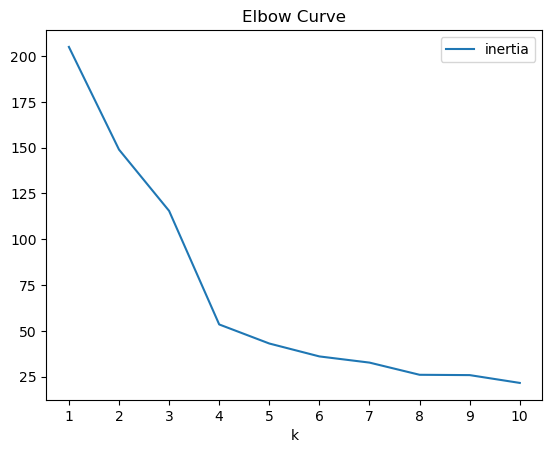

In [63]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**The best value is 4, it is where the sharp bend is located then it tends to flatten.



### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [64]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [65]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df)

C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [66]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 1, 0, 2, 0, 0])

In [67]:
# Create a copy of the DataFrame
crypto_predictions_df = market_data_scaled_df.copy()

In [68]:
# Add a new column to the DataFrame with the predicted clusters
crypto_predictions_df['crypto_cluster'] = crypto_clusters

# Display sample data
crypto_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,
bitcoin,0.508529,0.493193,0.235460,-0.067495,-0.251637,2
ethereum,0.185446,0.934445,-0.054341,-0.273483,-0.199352,2
tether,0.021774,-0.706337,-0.061030,0.008005,-0.282061,0
ripple,-0.040764,-0.810928,-0.050388,-0.373164,-0.295546,0
bitcoin-cash,1.193036,2.000959,0.545842,-0.291203,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

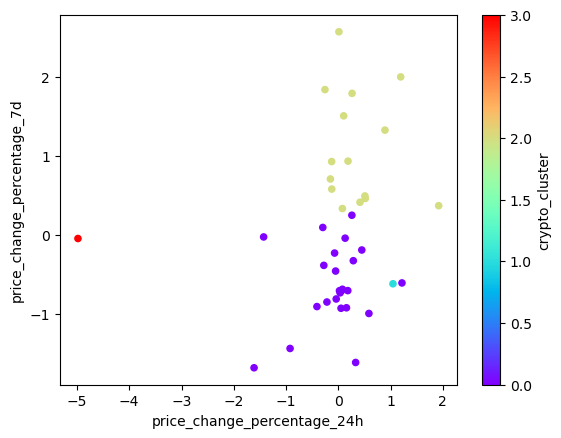

In [69]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [70]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [71]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
market_data_pca[0:5]

array([[-0.53095554, -0.39704401,  0.40991296],
       [-0.10682286, -0.55142821,  0.83937696],
       [-0.02435677, -0.05215751, -0.75600532],
       [ 0.18303532, -0.2160843 , -0.83305829],
       [-1.13701009, -0.98759122,  1.8559389 ]])

In [72]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37976757, 0.34487426, 0.19900075])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .924

In [73]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(market_data_pca, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
market_data_pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_pca_df.set_index('coin_id', inplace = True)

# Display sample data
market_data_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.530956,-0.397044,0.409913
ethereum,-0.106823,-0.551428,0.839377
tether,-0.024357,-0.052158,-0.756005
ripple,0.183035,-0.216084,-0.833058
bitcoin-cash,-1.137010,-0.987591,1.855939


### Find the Best Value for k Using the PCA Data

In [74]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

,k,inertia
0,1,189.346730
1,2,133.656827
2,3,100.264264
3,4,38.720111
4,5,29.549895


<Axes: title={'center': 'PCA Elbow Curve'}, xlabel='k'>

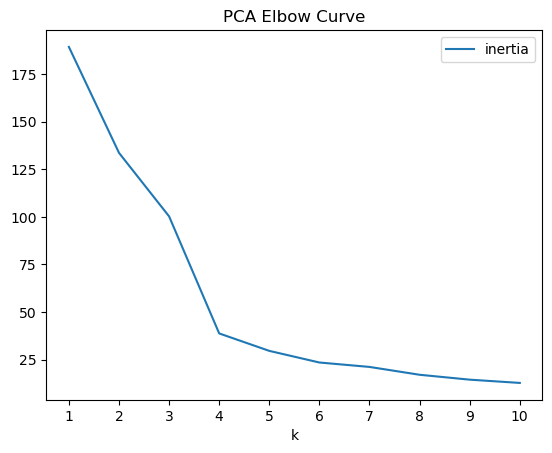

In [75]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="PCA Elbow Curve",
                   xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Best value is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [76]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [77]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

C:\Users\Chad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [78]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 2, 0, 2, 1, 0, 2, 0, 0])

In [79]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predictions_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predictions_df["crypto_cluster"] = crypto_clusters

# Display sample data
crypto_pca_predictions_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.530956,-0.397044,0.409913,2
ethereum,-0.106823,-0.551428,0.839377,2
tether,-0.024357,-0.052158,-0.756005,0
ripple,0.183035,-0.216084,-0.833058,0
bitcoin-cash,-1.137010,-0.987591,1.855939,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

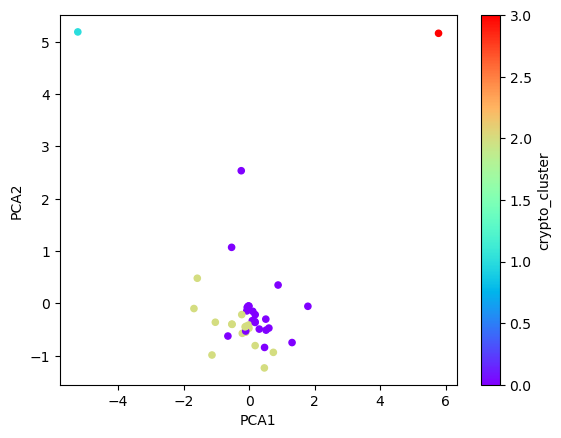

In [80]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [81]:
# Use the columns from the original scaled DataFrame as the index.
pca_components_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'],  index = market_data_scaled_df.columns)
pca_components_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.576833,-0.400638,-0.060191
price_change_percentage_7d,-0.086952,-0.202900,0.955460
price_change_percentage_30d,-0.563389,0.392473,0.125390
price_change_percentage_60d,-0.454365,0.541466,-0.055645
price_change_percentage_1y,0.368576,0.592538,0.254272


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PCA1 - Strongest positive is 1 yr and strongest negative is 24 hr.
PCA2 - Strongest positive is 1y and strongest negative is 24 hr.
PCA3 - Strongest positive is 7d and strongest negative is 24 hr.
    